In [2]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.optimize import minimize_scalar, root_scalar
from math import pi

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 12

We are using $M_{Pl} \equiv \sqrt{1/G}$ so the Friedmann equations are different

Text(0.5, 1.0, 'Potential')

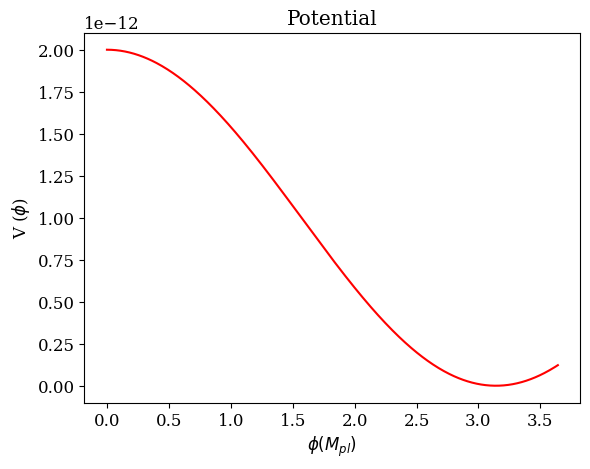

In [3]:
#parameters
f = 1
Lambda = 1e-3

#Potencial given
phi_pot = np.linspace(0,np.pi*f+0.5,500)

V = lambda phi: np.power(Lambda,4)*(1+np.cos(phi/f))
dV = lambda phi: -np.power(Lambda,4)/f*np.sin(phi/f)
ddV = lambda phi: -np.power(Lambda,4)/f/f*np.cos(phi/f)

#Figure for the potencial given
fig_pot, ax_pot = plt.subplots()

ax_pot.plot(phi_pot,V(phi_pot),color='r', linestyle='-')
ax_pot.set_xlabel(r'$\phi (M_{pl})$')
ax_pot.set_ylabel(r'V ($\phi$)')
ax_pot.set_title('Potential')

In [4]:
#slow-roll parameters
eps_v = lambda phi: 1/(16*np.pi)/(f*f)*np.sin(phi/f)*np.sin(phi/f)/(1+np.cos(phi/f))/(1+np.cos(phi/f))
eta_v = lambda phi: -1/(8*np.pi)/(f*f)*np.cos(phi/f)/(1+np.cos(phi/f))
HSR_2 = lambda phi: V(phi)*(8*np.pi)/3 #H in slow-roll

Text(0.5, 1.0, '$\\eta$ parameter')

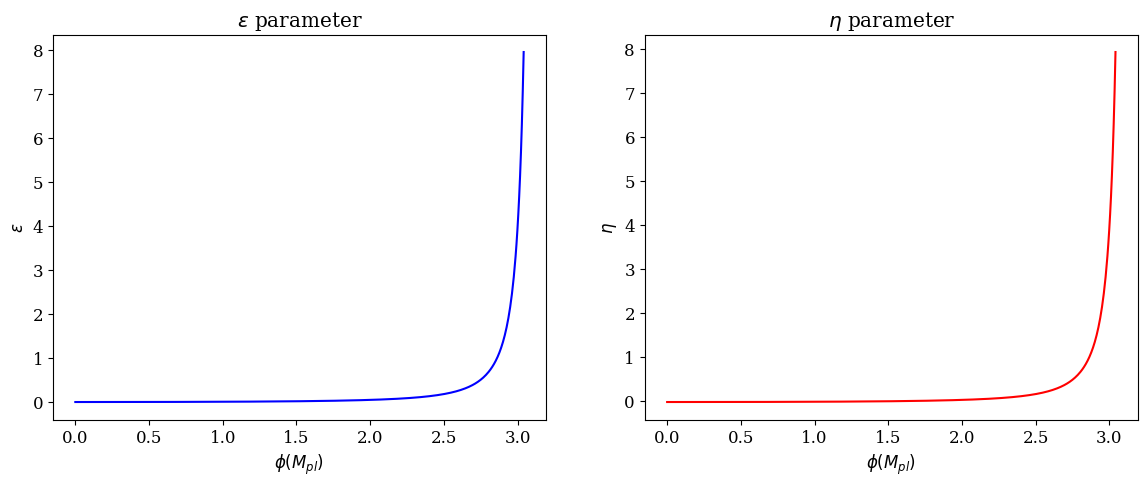

In [5]:
phiSR = np.linspace(0,np.pi*f-0.1,500)

#Figure for the slow-roll parameters
fig_SR = plt.figure()
fig_SR.set_figheight(5)
fig_SR.set_figwidth(14)

ax_eps = plt.subplot(1,2,1)
ax_eta = plt.subplot(1,2,2)

ax_eps.plot(phiSR,eps_v(phiSR),color='b', linestyle='-')
ax_eps.set_ylabel(r'$\epsilon$')
ax_eps.set_xlabel(r'$\phi (M_{pl})$')
ax_eps.set_title(r'$\epsilon$ parameter')

ax_eta.plot(phiSR,eta_v(phiSR),color='r', linestyle='-')
ax_eta.set_ylabel(r'$\eta$')
ax_eta.set_xlabel(r'$\phi (M_{pl})$')
ax_eta.set_title(r'$\eta$ parameter')

Parameters for inflation perturbations

Function to obtain ns and r

In [6]:
eps_1 = lambda phi: eps_v(phi)-1

#Lambda from the cmb constraints
As = 2.10e-9

#function to introduce N e-folds and f to obtain ns and r
def pert_params (f,N_star):
    #number of e-folds of inflation
    sol_zeros = root_scalar(eps_1, bracket=[0,np.pi*f-1e-8], method='brentq')
    phi_e = sol_zeros.root
    
    #phi0 for N e-folds given
    phi_star = 2*f*np.arcsin(np.sin(phi_e/2/f)*np.exp(-N_star/(16*np.pi)/(f*f)))

    Lambda4 = 12*np.pi*np.pi*As/f/f*np.sin(phi_star/f)/np.power(1+np.cos(phi_star/f),3)
    Lambda = np.power(Lambda4,1/4)

    ns = 1-6*eps_v(phi_star)+2*eta_v(phi_star)
    r = 16*eps_v(phi_star)

    return [Lambda,ns,r]

In [7]:
#array for f and limits N_star
N_low = 50
N_sup = 60

N_arr = [N_low,N_sup]
f_arr = np.linspace(0.5,2.5,101)

#ns and r arrays
ns_arr = [[],[]]
r_arr = [[],[]]

for f in f_arr:
    for i in range(2):
        Lambda,ns,r = pert_params(f,N_arr[i])

        ns_arr[i].append(ns)
        r_arr[i].append(r)

/tmp/ipykernel_3747/3725900732.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  eps_v = lambda phi: 1/(16*np.pi)/(f*f)*np.sin(phi/f)*np.sin(phi/f)/(1+np.cos(phi/f))/(1+np.cos(phi/f))


/tmp/ipykernel_3747/3725900732.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  eps_v = lambda phi: 1/(16*np.pi)/(f*f)*np.sin(phi/f)*np.sin(phi/f)/(1+np.cos(phi/f))/(1+np.cos(phi/f))


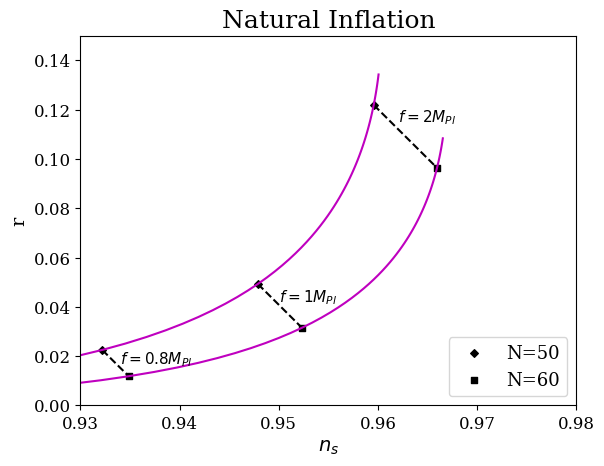

In [8]:
#Figure for the inflation perturbations
fig, ax = plt.subplots()

#specific points
f_spec = [0.8,1,2]
N_spec = np.linspace(50,60,50)

for f in f_spec:
    ns_spec = []
    r_spec = []

    for i in range(len(N_spec)):
        Lambda,ns,r = pert_params(f,N_spec[i])

        ns_spec.append(ns)
        r_spec.append(r)
    
    index_liked = np.where(f_arr == f)[0][0]
    ax.scatter(ns_arr[0][index_liked], r_arr[0][index_liked], s=15, c='k', marker='D')
    ax.scatter(ns_arr[1][index_liked], r_arr[1][index_liked], s=15, c='k', marker='s')

    ax.plot(ns_spec,r_spec,color='k', linestyle='--')

#complete range
ax.plot(ns_arr[0],r_arr[0],color='m', linestyle='-')
ax.plot(ns_arr[1],r_arr[1],color='m', linestyle='-')

ax.text(0.962,0.115,r'$f=2 M_{Pl}$', size=11)
ax.text(0.95,0.042,r'$f=1 M_{Pl}$', size=11)
ax.text(0.934,0.017,r'$f=0.8 M_{Pl}$', size=11)

ax.set_xlabel(r'$n_s$', size=14)
ax.set_ylabel(r'r', size=14)
ax.set_xlim([0.93,0.98])
ax.set_ylim([0,0.15])
ax.legend(['N=50', 'N=60'], loc='lower right', fontsize=13)
ax.set_title('Natural Inflation', size=18)

fig.savefig('Natural_Inflation.png')